# Module 6, Activity 5: Additional Map Elements

In our final activity for this Module, we're going to look at how to add additional elements that will help our audience decode our maps. We'll look at three elements: scale bars, north arrows and legends. Let's get started by loading packages and extracting all flights - domestic and international - that depart Brisbane in our routes dataset from last activity. We'll also append latitude and longitude information for the start and end points of each flight route. We'll need to import some additional packages at different points in this exercise, be sure to install them as you go if needed.

In [50]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

aus_map = gpd.read_file("data/Australia_Boundaries/")

routes = pd.read_csv("data/flight_routes.csv") # sourced from https://www.kaggle.com/datasets/open-flights/flight-route-database
airport_locs = pd.read_csv("data/airport_locations.csv") # sourced from https://ourairports.com/data/

bne_routes = routes[routes.iata_source == "BNE"]

bne_routes = bne_routes.merge(airport_locs[["iata_code", "city", "longitude", "latitude"]], 
                                 left_on = ["iata_source"], right_on = "iata_code", 
                                 how = "left")

bne_routes = bne_routes.merge(airport_locs[["iata_code", "city", "longitude", "latitude"]], 
                                 left_on = ["iata_destination"], right_on = "iata_code", 
                                 how = "left", suffixes = ("_source", "_destination"))

bne_routes = bne_routes.drop(bne_routes.filter(regex='iata_code').columns, axis=1)

Now, let's create a map showing all the flight routes from Brisbane International Airport, using what we learned so far this Module.

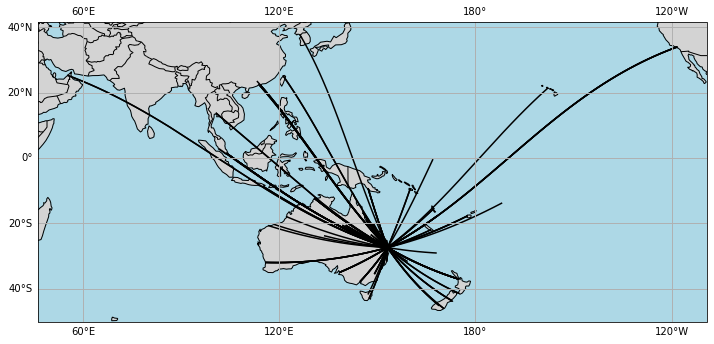

In [52]:
crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines

ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for routes
ax.plot([bne_routes.longitude_source, bne_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [bne_routes.latitude_source, bne_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = "black") 

plt.show()

Next, let's add a scale bar, which gives a reference for distances and the size of different features in a map. We can do this with [**ScaleBar**](https://pypi.org/project/matplotlib-scalebar/) from the **matplotlib_scalebar** package. Note that this is a new package that provides an additional scale bar artist to Matplotlib. We also need the [**great_distance**](https://pypi.org/project/pygc/) function from **pygc** to calculate the distance between two spatial points in our projection. This distance will inform our scale bar. 

NOTE! As we know by now, the distance between two points on a 2D projection of a sphere is not constant for all points - if we choose two points one degree of longitude apart in Antarctica, the distance between the points will be different than if we chose two points also one degree of longitude apart in India. So, you wouldn't add a scale bar to a spatial map covering a large area, where the Earth's curvature starts to have a noticeable effect on the distance between any two points. We're breaking this rule here though so we can demonstrate how to include a scale bar.

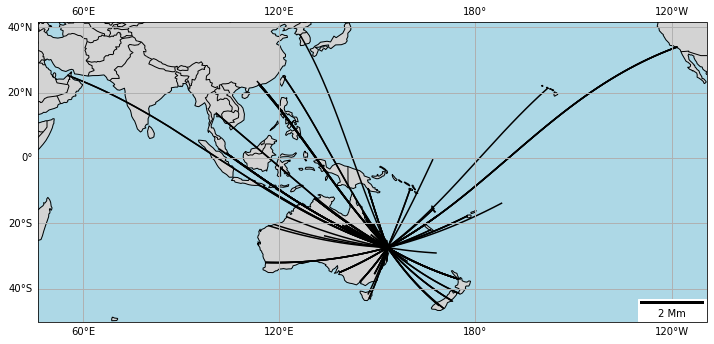

In [53]:
from matplotlib_scalebar.scalebar import ScaleBar
import pygc
from pygc import great_distance # https://pypi.org/project/pygc/


crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines


ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for routes
ax.plot([bne_routes.longitude_source, bne_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [bne_routes.latitude_source, bne_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = "black") 

# Scale Bar
dist=great_distance(start_latitude=-24, start_longitude=134,
                    end_latitude=-24, end_longitude=135) # Find distance between two points 1 degree of longitude apart
                                                        # in the middle of australia
dx=dist['distance'] # Extract distance between two points, from dist output list
ax.add_artist(ScaleBar(dx=dx, # dx is the size of one pixel in units specified
                       units='m', # SI-units of our scale bar, could choose a non-SI measurements like imperial feet, but best to stick with SI
                       location ='lower right')) # location of the Scale Bar 

plt.show()

The label on the scale bar is 2Mm, meaning 2 million metres. This isn't a helpful unit, so let's format the scale using the **scale_formatter** argument in ScaleBar, so we convert metres to kilometres. Since 1000 metres is one kilometre, our scale bar label should read 2000 km.

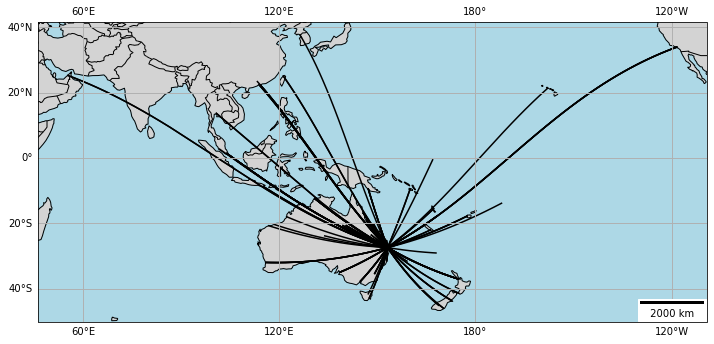

In [54]:
from matplotlib_scalebar.scalebar import ScaleBar
import pygc
from pygc import great_distance # https://pypi.org/project/pygc/


crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines


ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for routes
ax.plot([bne_routes.longitude_source, bne_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [bne_routes.latitude_source, bne_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = "black") 

# Scale Bar
dist=great_distance(start_latitude=-24, start_longitude=134,
                    end_latitude=-24, end_longitude=135) # Find distance between two points 1 degree of longitude apart
                                                        # in the middle of australia
dx=dist['distance'] # Extract distance between two points, from dist output list
ax.add_artist(ScaleBar(dx=dx, # dx is the size of one pixel in units specified
                       units='m', # SI-units of our scale bar, could choose a non-SI measurements like imperial feet, but best to stick with SI
                       location ='lower right', # location of the Scale Bar 
                      scale_formatter=lambda value, unit: f' {value * 1000} km ',)) # Take scalebar value, multiply by 1000, then use km as the unit


plt.show()

**Exercises:**
1) We used the distance between one degree of longitude in the middle of Australia to format our scalebar in the figure above. To see how the scalebar is sensitive to our 2D projection at this extent, change the start and end latitude so we use one degree of longitude in Antarctica as our reference. How does the scale bar change? Try a point close to the equator as well.\
2) Experiment with the scale_formatter argument in the ScaleBar function. For instance, change km to kilometre. What if we wanted the scale in centimetres? What would we need to multiply the value by?

Next, let's add an North Arrow showing the direction of north on our map. We can do this using **ax.annotate**.

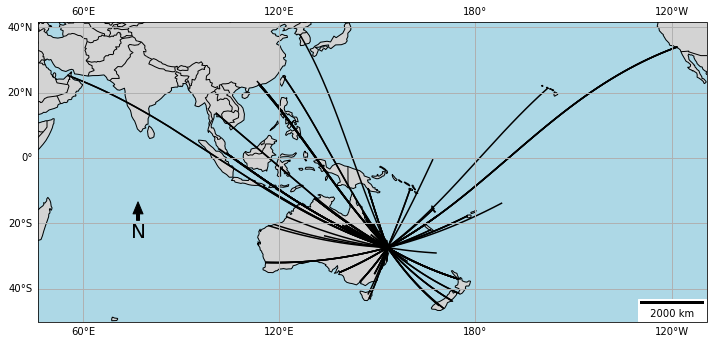

In [48]:
from matplotlib_scalebar.scalebar import ScaleBar
import pygc
from pygc import great_distance # https://pypi.org/project/pygc/


crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines


ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for routes
ax.plot([bne_routes.longitude_source, bne_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [bne_routes.latitude_source, bne_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = "black") 

# Scale Bar
dist=great_distance(start_latitude=-24, start_longitude=134,
                    end_latitude=-24, end_longitude=135) # Find distance between two points 1 degree of longitude apart
                                                        # in the middle of australia
dx=dist['distance'] # Extract distance between two points, from dist output list
ax.add_artist(ScaleBar(dx=dx, # dx is the size of one pixel in units specified
                       units='m', # SI-units of our scale bar, could choose a non-SI measurements like imperial feet, but best to stick with SI
                       location ='lower right', # location of the Scale Bar 
                      scale_formatter=lambda value, unit: f' {value * 1000} km ',)) # Take scalebar value, multiply by 1000, then use km as the unit

# North Arrow
x, y = 0.15, 0.4 # x and y-coordinates of arrow
arrow_length = 0.1 # length of arrow
ax.annotate('N', xy=(0.15, 0.4), # Location of arrow point
            xytext=(x, y-arrow_length), # Location of "N" annotation
            arrowprops=dict(facecolor='black', width=3, headwidth=10), # Arrow aesthetics
            ha='center', va='center', fontsize=20, # Location and font size of "N" annotation
            xycoords=ax.transAxes) # Give our annotation the coordinate system of the axes itself, so the bottom
                                   # left corner's coordinates are 0,0 and the top right's coordinates are 1,1. 
                                   # This makes it much easier for us to move the annotation and control its size, 
                                   # relative to the axes itself.

plt.show()

**Exercise:** Experiment with location, text and aesthetics of the North Arrow.

Finally, let's add a legend to our figure. Before we do this, let's distinguish the different routes by colour, depending on if they are flown by Qantas, Virgin Australia or any other airline.

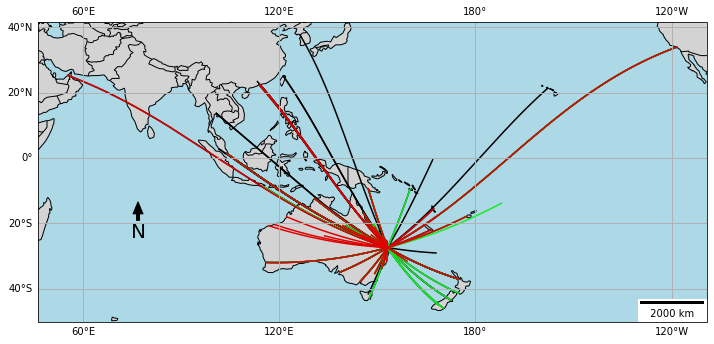

In [55]:
# Subset the data by airline
virgin_routes = bne_routes[bne_routes.airline == "VA"]
qantas_routes = bne_routes[bne_routes.airline == "QF"]
other_routes = bne_routes[~bne_routes.airline.isin(["VA", "QF"])]

airlines=["Qantas Airways", "Virgin Australia", "Other Airlines"]
colours=["#DF0000", "#13ec22", "black"]

crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines


ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for 
ax.plot([other_routes.longitude_source, other_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [other_routes.latitude_source, other_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[2]) 

ax.plot([virgin_routes.longitude_source, virgin_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [virgin_routes.latitude_source, virgin_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[1]) 

ax.plot([qantas_routes.longitude_source, qantas_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [qantas_routes.latitude_source, qantas_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[0]) 

# Scale Bar
dist=great_distance(start_latitude=-24, start_longitude=134,
                    end_latitude=-24, end_longitude=135) # Find distance between two points 1 degree of longitude apart
                                                        # in the middle of australia
dx=dist['distance'] # Extract distance between two points, from dist output list
ax.add_artist(ScaleBar(dx=dx, # dx is the size of one pixel in units specified
                       units='m', # SI-units of our scale bar, could choose a non-SI measurements like imperial feet, but best to stick with SI
                       location ='lower right', # location of the Scale Bar 
                      scale_formatter=lambda value, unit: f' {value * 1000} km ',)) # Take scalebar value, multiply by 1000, then use km as the unit

# North Arrow
x, y = 0.15, 0.4 # x and y-coordinates of arrow
arrow_length = 0.1 # length of arrow
ax.annotate('N', xy=(0.15, 0.4), # Location of arrow point
            xytext=(x, y-arrow_length), # Location of "N" annotation
            arrowprops=dict(facecolor='black', width=3, headwidth=10), # Arrow aesthetics
            ha='center', va='center', fontsize=20, # Location and font size of "N" annotation
            xycoords=ax.transAxes) # Give our annotation the coordinate system of the axes itself, so the bottom
                                   # left corner's coordinates are 0,0 and the top right's coordinates are 1,1. 
                                   # This makes it much easier for us to move the annotation and control its size, 
                                   # relative to the axes itself.

plt.show()

Many of these routes would be flown by multiple airlines, but we've plotted Qantas on top, followed by Virgin Australia then all other airlines. If you changed this ordering the line colours would change.

Unlike in earlier modules, cartopy axes artists can't be automatically turned into legend entries. Instead, we need to use Matplotlib's **mpatches** function to build legend entries manually (see [here](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists) for more information). 

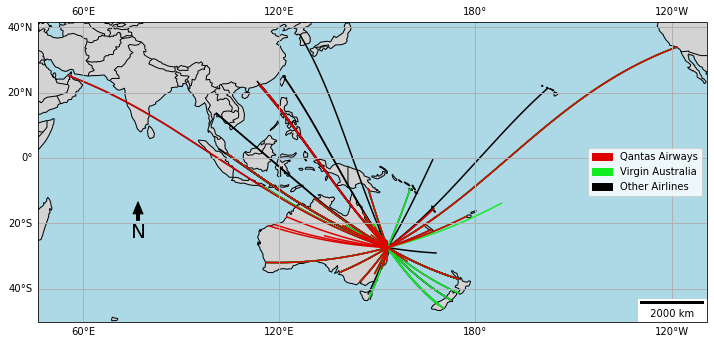

In [56]:
# Subset the data by airline
virgin_routes = bne_routes[bne_routes.airline == "VA"]
qantas_routes = bne_routes[bne_routes.airline == "QF"]
other_routes = bne_routes[~bne_routes.airline.isin(["VA", "QF"])]

airlines=["Qantas Airways", "Virgin Australia", "Other Airlines"]
colours=["#DF0000", "#13ec22", "black"]

crss = ccrs.PlateCarree(central_longitude = 180)
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.LAND, facecolor = "#d3d3d3") # Add land
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.BORDERS) # Add national borders
ax.coastlines() # inbuilt function to add the world coastline
ax.gridlines() # inbuilt function to add gridlines


ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Add lines for 
ax.plot([other_routes.longitude_source, other_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [other_routes.latitude_source, other_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[2]) 

ax.plot([virgin_routes.longitude_source, virgin_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [virgin_routes.latitude_source, virgin_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[1]) 

ax.plot([qantas_routes.longitude_source, qantas_routes.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [qantas_routes.latitude_source, qantas_routes.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = colours[0]) 

# Scale Bar
dist=great_distance(start_latitude=-24, start_longitude=134,
                    end_latitude=-24, end_longitude=135) # Find distance between two points 1 degree of longitude apart
                                                        # in the middle of australia
dx=dist['distance'] # Extract distance between two points, from dist output list
ax.add_artist(ScaleBar(dx=dx, # dx is the size of one pixel in units specified
                       units='m', # SI-units of our scale bar, could choose a non-SI measurements like imperial feet, but best to stick with SI
                       location ='lower right', # location of the Scale Bar 
                      scale_formatter=lambda value, unit: f' {value * 1000} km ',)) # Take scalebar value, multiply by 1000, then use km as the unit

# North Arrow
x, y = 0.15, 0.4 # x and y-coordinates of arrow
arrow_length = 0.1 # length of arrow
ax.annotate('N', xy=(0.15, 0.4), # Location of arrow point
            xytext=(x, y-arrow_length), # Location of "N" annotation
            arrowprops=dict(facecolor='black', width=3, headwidth=10), # Arrow aesthetics
            ha='center', va='center', fontsize=20, # Location and font size of "N" annotation
            xycoords=ax.transAxes) # Give our annotation the coordinate system of the axes itself, so the bottom
                                   # left corner's coordinates are 0,0 and the top right's coordinates are 1,1. 
                                   # This makes it much easier for us to move the annotation and control its size, 
                                   # relative to the axes itself.

#Legend  
import matplotlib.patches as mpatches  

legend_elements = [mpatches.Patch(color=colours[0], label=airlines[0]),
                   mpatches.Patch(color=colours[1], label=airlines[1]),
                  mpatches.Patch(color=colours[2], label = airlines[2])] # Create array of legend elements

ax.legend(handles=legend_elements, loc='center right')

plt.show()

**Exercise:** For our legend entries above, we used patches of colour. We can also use Matplotlib's **lines** function to draw lines instead. Try drawing lines for our legend elements instead of patches, using the reference material [here](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists) as a guide and starting point.